________
# Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks
_________

## Objective
_______
**The objective is to develop a predictive model for diabetes progression using available independent variables. This model will help healthcare professionals gain a deeper understanding of how various factors influence diabetes progression. The insights derived from this analysis can aid in designing effective treatment plans and preventive strategies, ultimately improving patient care and outcomes. Additionally, the model aims to provide a quantitative framework to evaluate the dynamics of diabetes progression, enabling informed decision-making in clinical and public health contexts.**

_______
## Dataset:
_________
+ Use the Diabetes dataset available in the sklearn library.

__________
# Importing Modules
_____

In [1]:
import pandas as pd
import numpy as np
from  sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Loading and Preprocessing
___________

In [2]:
diabetes_data = load_diabetes()
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# get feature_names
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

In [5]:
# Convert to DataFrame for easy handling
df = pd.DataFrame(X, columns=diabetes_data.feature_names)
df['diabetes_progression'] = y

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
df.shape

(442, 11)

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  diabetes_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Note:
+ Each of these 10 feature variables have been mean centered and scaled
_____________

In [12]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

age                     0
sex                     0
bmi                     0
bp                      0
s1                      0
s2                      0
s3                      0
s4                      0
s5                      0
s6                      0
diabetes_progression    0
dtype: int64


+ No null values detected.
_______________

In [14]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
0


+ No duplicate values
___________

In [15]:
df.nunique()

age                      58
sex                       2
bmi                     163
bp                      100
s1                      141
s2                      302
s3                       63
s4                       66
s5                      184
s6                       56
diabetes_progression    214
dtype: int64

__________
# 2. Exploratory Data Analysis (EDA)
___________

In [20]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [22]:
df.dtypes

age                     float64
sex                     float64
bmi                     float64
bp                      float64
s1                      float64
s2                      float64
s3                      float64
s4                      float64
s5                      float64
s6                      float64
diabetes_progression    float64
dtype: object

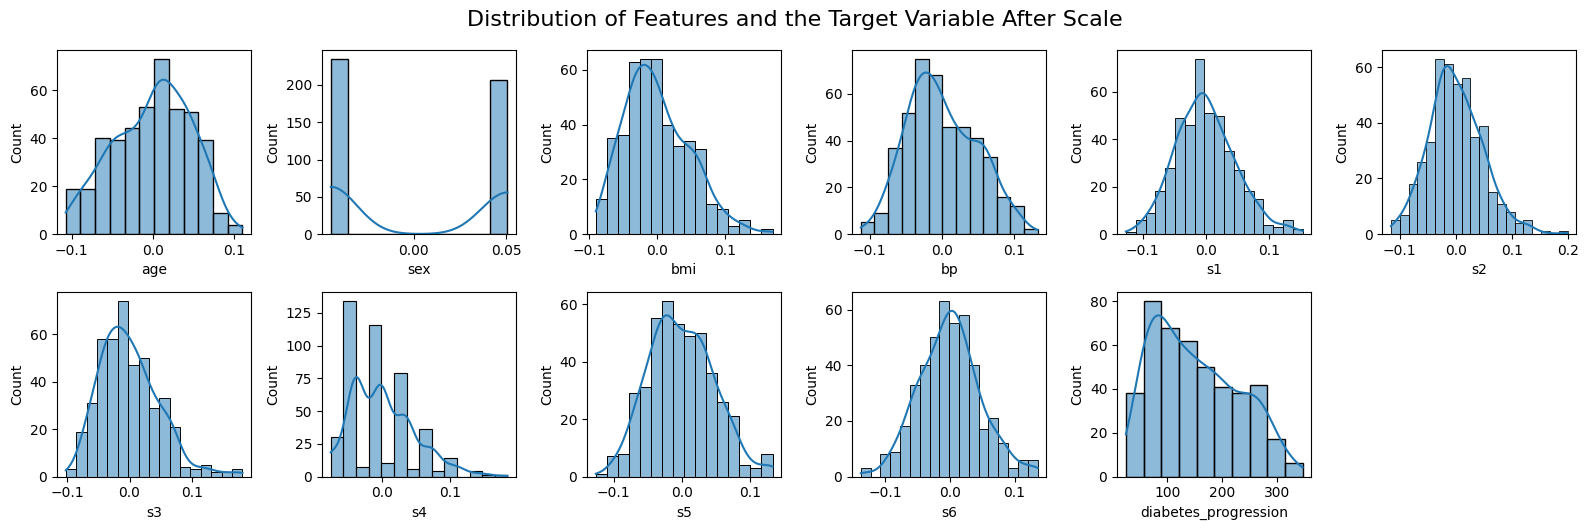

In [23]:
# Visualizing Distribution of Features
plt.figure(figsize=(16,5))
index = 0
for col in df.columns:
    index += 1
    plt.subplot(2, 6, index)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.suptitle('Distribution of Features and the Target Variable After Scale', y=1.05, fontsize = 16)
plt.show()

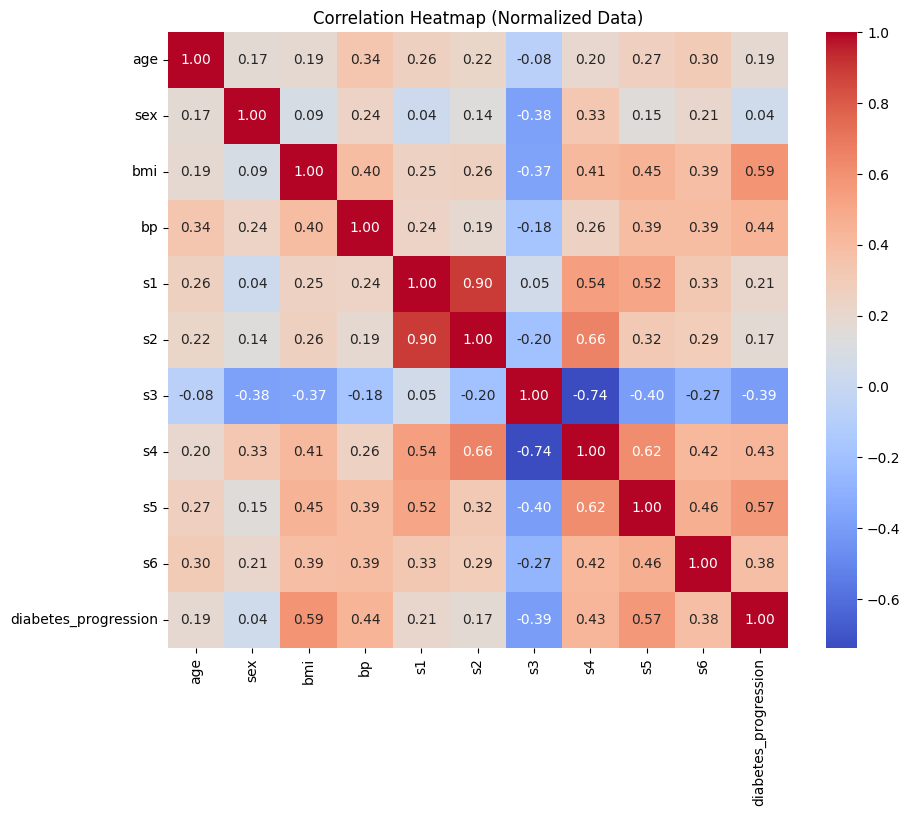

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Normalized Data)")
plt.show()

_________
### INSIGHTS:

**Features with Strong Correlation to Diabetes Progression:**

* BMI: 0.59 (strong positive correlation)
* S5: 0.57 (strong positive correlation)
* BP: 0.44 (moderate positive correlation)
* S4: 0.44 (moderate positive correlation)
* S3: -0.40(moderate negative correlation)
* S6: 0.38 (moderate positive correlation)

**Multicollinearity:**

* S1 and S2: Correlation = 0.89 (very high)
* S4 and S2: Correlation = 0.65 (high)
* S4 and S5: Correlation = 0.62 (moderate)
* S3 and S4: Correlation = -0.75 (high negative)

**Best Features:**

* BMI (0.59 correlation with target)
* S5 (0.57 correlation with target)
* BP (0.44 correlation with target)
* S6 (0.38 correlation with target)
* S3 (-0.40 correlation with target)
____________

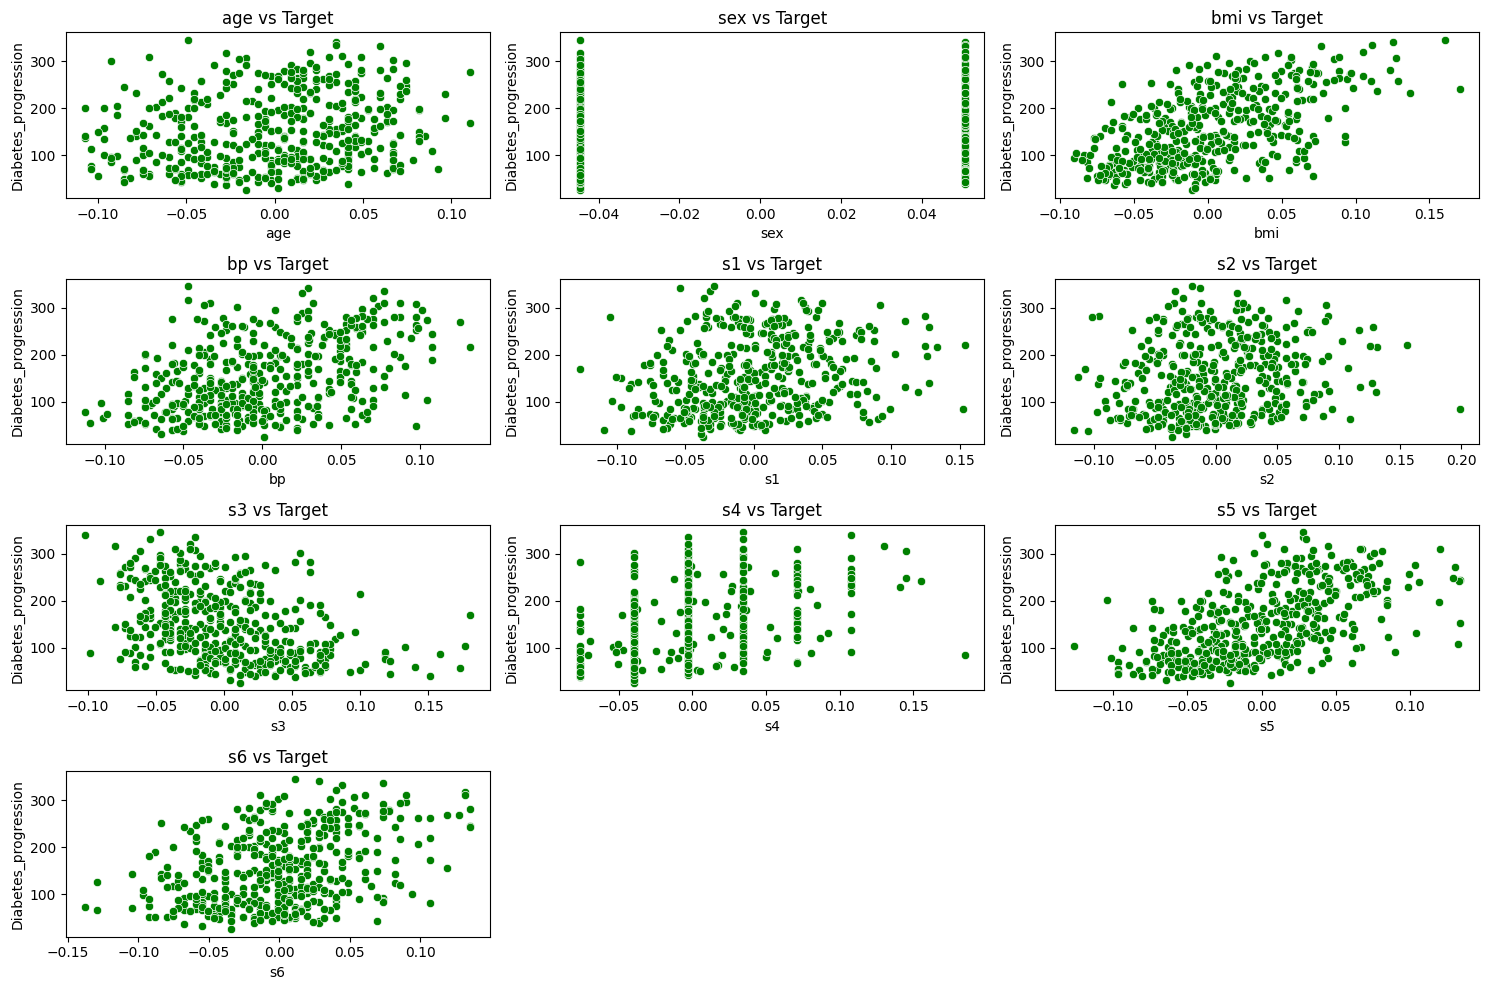

In [25]:
# Scatter Plots for Features vs. Target 

# Number of features
num_features = len(diabetes_data.feature_names)

# Create subplots with 3 columns
fig, axes = plt.subplots((num_features + 2) // 3, 3, figsize=(15, 10))
axes = axes.ravel()  # Flatten the grid for easy iteration

for i, column in enumerate(diabetes_data.feature_names):
    sns.scatterplot(x=df[column], y=df["diabetes_progression"], ax=axes[i], color="green")
    axes[i].set_title(f"{column} vs Target")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Diabetes_progression")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Remark:

* BMI and S5 shows a strong linear relation with the diabetes progression

* S3 shows negative linear relation with the diabetes progression

_____________

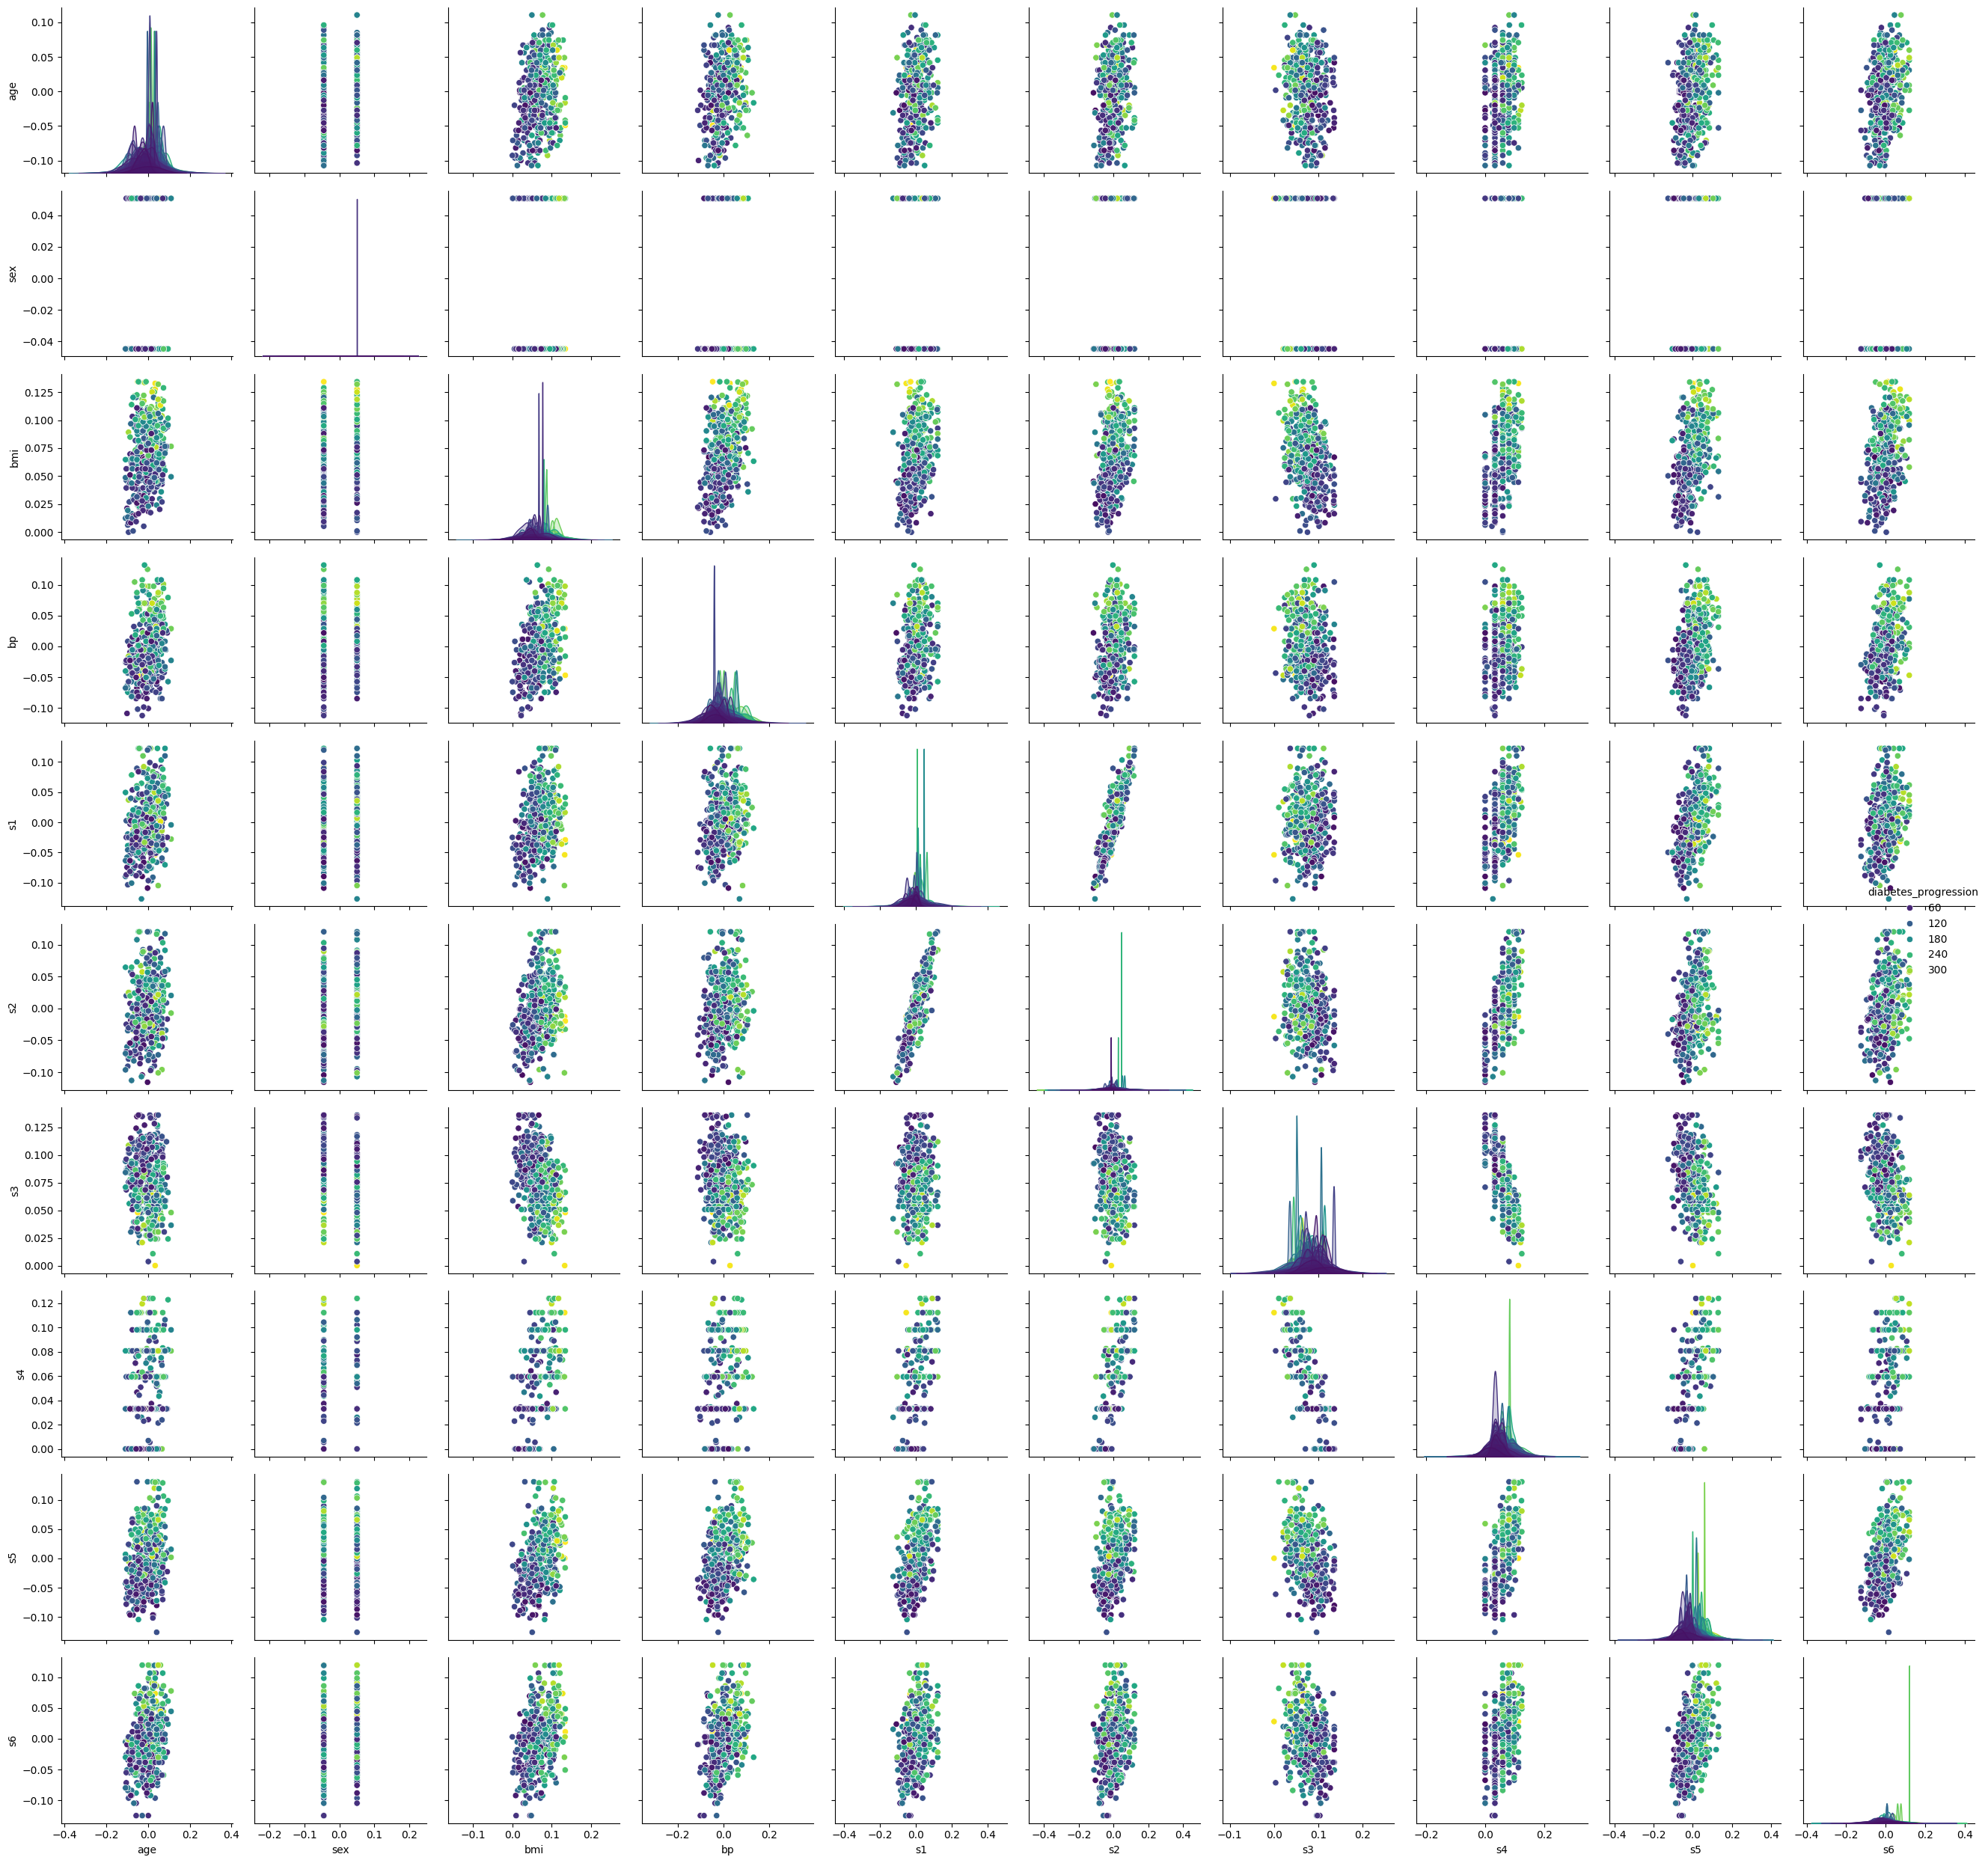

In [64]:
sns.pairplot(df, hue='diabetes_progression', palette='viridis')
plt.tight_layout()
plt.show()

_______________
### Outlier detection and handling
_________________

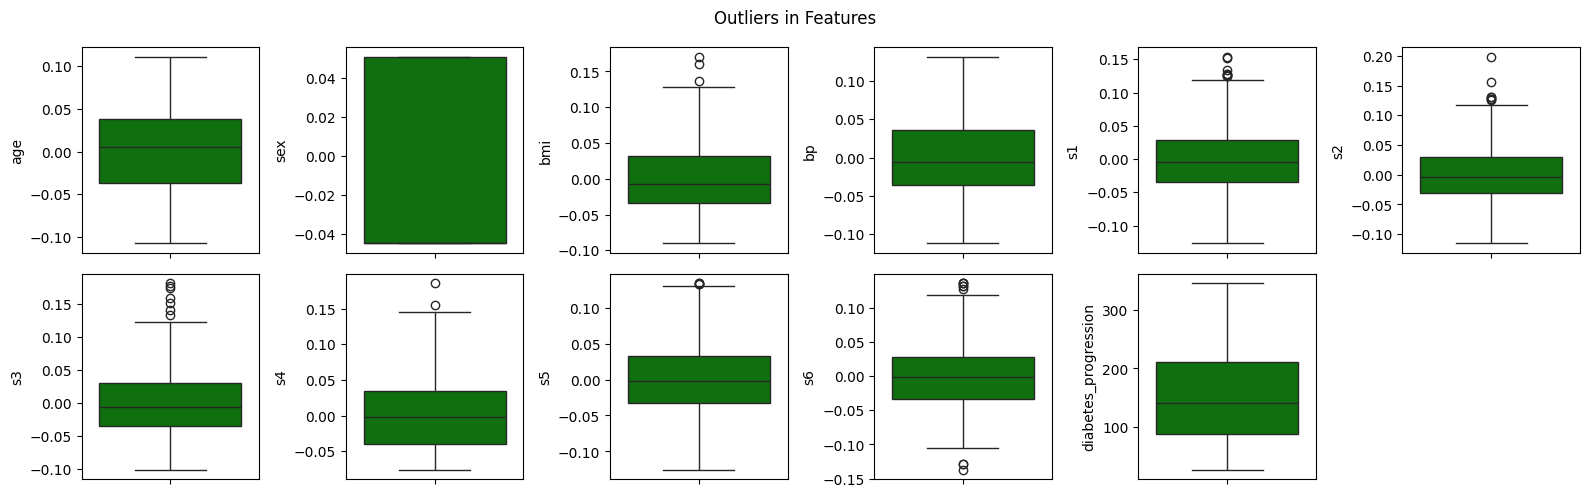

In [27]:
plt.figure(figsize=(16,5))
plt_index = 0
for col in ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','diabetes_progression']:
  plt_index +=1
  plt.subplot(2,6,plt_index)
  sns.boxplot(data=df[col], color='green')
plt.suptitle('Outliers in Features')
plt.tight_layout()
plt.show()

In [28]:
for col in ['bmi','s1','s2','s3','s4','s5','s6']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col]<lower_bound, lower_bound, np.where(df[col]>upper_bound, upper_bound, df[col]))

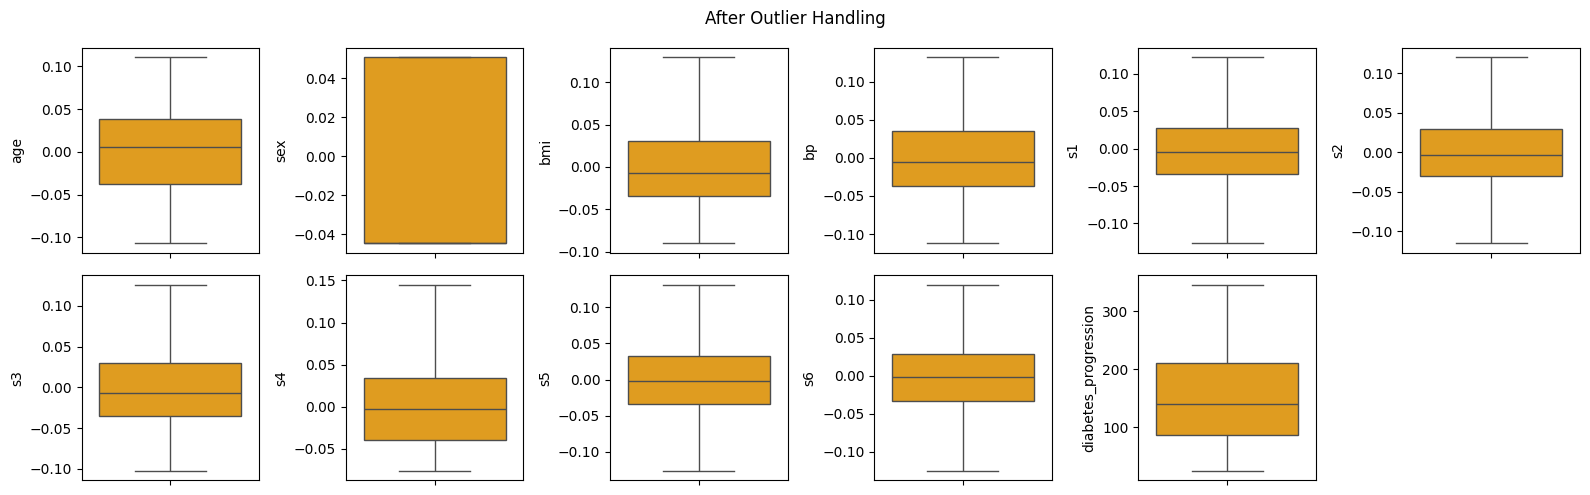

In [29]:
plt.figure(figsize=(16,5))
plt_index = 0
for col in ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','diabetes_progression']:
  plt_index +=1
  plt.subplot(2,6,plt_index)
  sns.boxplot(data=df[col], color= 'orange')
plt.suptitle('After Outlier Handling')
plt.tight_layout()
plt.show()

_____________
### Skewness and Transformation
____________

In [30]:
from scipy.stats import skew

# Calculate skewness for all features (excluding the target column)
skewness = df.apply(skew)

print("Skewness of Features:\n", skewness)

Skewness of Features:
 age                    -0.230596
sex                     0.126952
bmi                     0.516202
bp                      0.289671
s1                      0.294899
s2                      0.261378
s3                      0.559797
s4                      0.672217
s5                      0.282995
s6                      0.164499
diabetes_progression    0.439066
dtype: float64


In [31]:
# Identify features with high skewness (|skewness| > 0.5)
high_skew_features = skewness[abs(skewness) > 0.5].index
print("\nFeatures with High Skewness:\n", high_skew_features)


Features with High Skewness:
 Index(['bmi', 's3', 's4'], dtype='object')


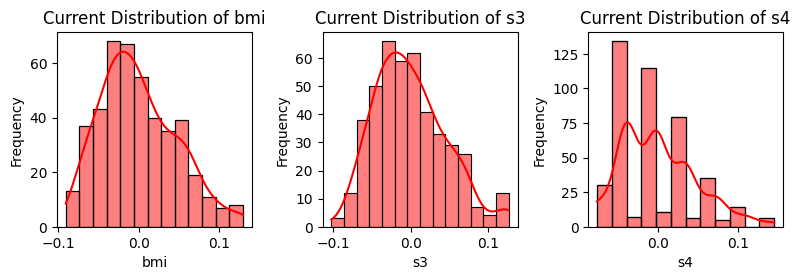

In [32]:
plt.figure(figsize=(16,5))
index = 0
for feature in ['bmi', 's3', 's4']:
    index += 1
    plt.subplot(2, 6, index)
    sns.histplot(df[feature], kde=True, color="red")
    plt.title(f"Current Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [33]:
# Check summary statistics before transformation
print("Summary Statistics Before Transformation:")
print(df[['bmi', 's3', 's4']].describe())


Summary Statistics Before Transformation:
              bmi          s3          s4
count  442.000000  442.000000  442.000000
mean    -0.000181   -0.000533   -0.000114
std      0.047056    0.045934    0.047227
min     -0.090275   -0.102307   -0.076395
25%     -0.034229   -0.035117   -0.039493
50%     -0.007284   -0.006584   -0.002592
75%      0.031248    0.029312    0.034309
max      0.129464    0.125954    0.145012


In [34]:
from scipy.stats import boxcox

# Check if all values are positive in the features we are transforming
print("Minimum values before transformation:")
print(df[['bmi', 's3', 's4']].min())

Minimum values before transformation:
bmi   -0.090275
s3    -0.102307
s4    -0.076395
dtype: float64


In [35]:
# If the minimum value is negative or zero, we add a constant to shift the values
# We add a constant to make all values positive, e.g., adding 1 to the minimum value + 1
df['bmi'] = df['bmi'] + abs(df['bmi'].min()) + 1 if df['bmi'].min() <= 0 else df['bmi']
df['s3'] = df['s3'] + abs(df['s3'].min()) + 1 if df['s3'].min() <= 0 else df['s3']
df['s4'] = df['s4'] + abs(df['s4'].min()) + 1 if df['s4'].min() <= 0 else df['s4']


In [36]:
# Apply Box-Cox transformation
df['bmi'], _ = boxcox(df['bmi'])
df['s3'], _ = boxcox(df['s3'])
df['s4'], _ = boxcox(df['s4'])

In [37]:
# Check summary statistics after transformation
print("\nSummary Statistics After Box-Cox Transformation:")
print(df[['bmi', 's3', 's4']].describe())



Summary Statistics After Box-Cox Transformation:
              bmi          s3          s4
count  442.000000  442.000000  442.000000
mean     0.068979    0.076197    0.057114
std      0.029239    0.026687    0.028715
min      0.000000    0.000000    0.000000
25%      0.048692    0.056666    0.033005
50%      0.067661    0.075480    0.059433
75%      0.090843    0.095722    0.080758
max      0.134305    0.136093    0.123939


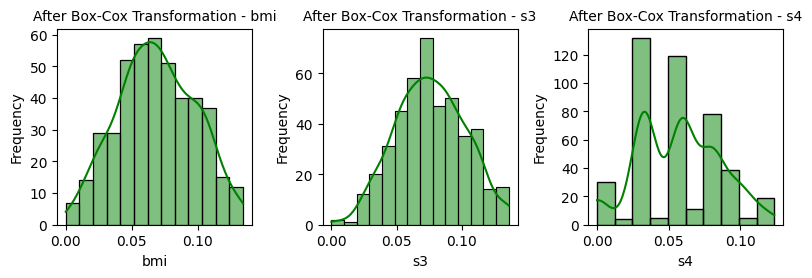

In [38]:
# Plot the transformed features
plt.figure(figsize=(16, 5))
index = 0
for feature in ['bmi', 's3', 's4']:
    index += 1
    plt.subplot(2, 6, index)
    sns.histplot(df[feature], kde=True, color="green")
    plt.title(f"After Box-Cox Transformation - {feature}", fontsize=10)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Insights
After applying the **Box-Cox transformation**, the distributions of **bmi, s3, and s4** will become **more symmetric** and **closer to a normal distribution.** The summary statistics should also show the transformed values.
___________

## Splitting of data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Splitting the data into independent variables (X) and target variable (y)
X = df.drop(columns='diabetes_progression', axis=1)
y = df['diabetes_progression']

In [41]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 353 samples
Test set size: 89 samples


In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


__________
# 3.Building the ANN Model
_____________

+ Design a simple ANN architecture.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [68]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


____________
# 4.Training the ANN Model
_____________

In [46]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.106422,0.021872,-0.044223,-0.034821,0.050691,0.059433,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,0.035157,-0.026328,-0.008449,-0.019163,0.116764,0.033005,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.097868,-0.005670,-0.045599,-0.034194,0.058609,0.059433,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,0.064791,-0.036656,0.012191,0.024991,0.056018,0.080758,0.022688,-0.009362,206.0
4,0.005383,-0.044642,0.047063,0.021872,0.003935,0.015596,0.084209,0.059433,-0.031988,-0.046641,135.0


In [47]:
x_final = df                             
x_final.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.106422,0.021872,-0.044223,-0.034821,0.050691,0.059433,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,0.035157,-0.026328,-0.008449,-0.019163,0.116764,0.033005,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.097868,-0.005670,-0.045599,-0.034194,0.058609,0.059433,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,0.064791,-0.036656,0.012191,0.024991,0.056018,0.080758,0.022688,-0.009362,206.0
4,0.005383,-0.044642,0.047063,0.021872,0.003935,0.015596,0.084209,0.059433,-0.031988,-0.046641,135.0


In [48]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: diabetes_progression, dtype: float64

####  Train the model on the training data.

In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 28738.2754 - val_loss: 26510.0020
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29057.7871 - val_loss: 26459.2363
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30015.0176 - val_loss: 26383.9434
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28636.5430 - val_loss: 26267.9375
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27666.1973 - val_loss: 26089.5508
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31050.8613 - val_loss: 25828.3125
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29860.2227 - val_loss: 25465.2480
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29020.5723 - val_loss: 24969.1426
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29019.7129 - val_loss: 24326.5273
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27267.2793 - val_loss: 23521.6113
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss

____________
# 5.Evaluating the Model
___________

#### Evaluate the model on the testing data.

In [50]:
# Make predictions
y_predict = model.predict(X_test)
y_predict = y_predict.flatten()

# Evaluate the model
loss_mae = model.evaluate(X_test, y_test)  # Returns a single float value since only one metric ('mae') is used

# Calculate additional metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Loss (MSE):", loss_mae)  # Directly print the loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3338.2617
Mean Squared Error: 3181.5709239783027
Mean Absolute Error: 47.060134459077645
R2 Score: 0.39949418684183746
Loss (MSE): 3181.571044921875


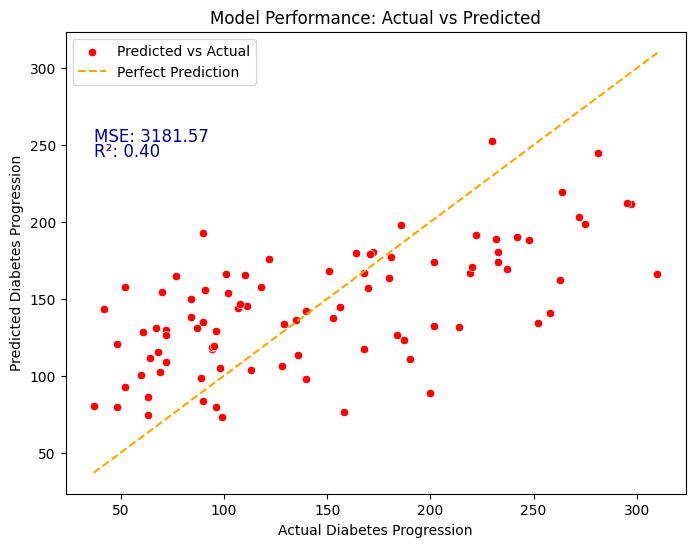

In [53]:
# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict, color='red', label="Predicted vs Actual")

# Adding a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Model Performance: Actual vs Predicted')

# Displaying the metrics on the plot
plt.text(min(y_test), max(y_predict), f'MSE: {mse:.2f}', fontsize=12, color='darkblue')
plt.text(min(y_test), max(y_predict)-10, f'R²: {r2:.2f}', fontsize=12, color='darkblue')

# Show plot with legend
plt.legend()
plt.show()


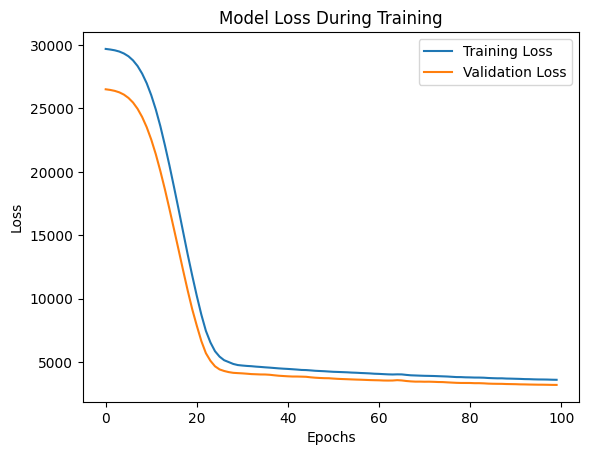

In [54]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

___________
# 6.Improving the Model
_______

In [67]:
model_improved = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [66]:
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [59]:
# Train the new model
history_improved = model_improved.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 28809.6367 - val_loss: 26461.6973
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29057.0039 - val_loss: 26263.1289
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29709.8359 - val_loss: 25772.9727
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29314.2266 - val_loss: 24647.6367
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26491.7012 - val_loss: 22408.1562
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24345.9023 - val_loss: 18707.0000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19175.0020 - val_loss: 13511.1631
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13334.7920 - val_loss: 7959.9604
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8206.1270 - val_loss: 4761.9233
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5291.9922 - val_loss: 4410.6968
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 488

In [60]:
# Make predictions
y_predict_improved = model_improved.predict(X_test)
y_predict_improved = y_predict_improved.flatten()

# Evaluate the improved model
loss_mae_improved = model_improved.evaluate(X_test, y_test)  # Single float value if only one metric is used

# Calculate additional metrics
mse_improved = mean_squared_error(y_test, y_predict_improved)
mae_improved = mean_absolute_error(y_test, y_predict_improved)
r2_improved = r2_score(y_test, y_predict_improved)

print("Improved Model Mean Squared Error (MSE):", mse_improved)
print("Improved Model Mean Absolute Error (MAE):", mae_improved)
print("Improved Model R² Score:", r2_improved)
print("Improved Model Loss (MSE from evaluate):", loss_mae_improved)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3202.6377
Improved Model Mean Squared Error (MSE): 3017.6827470407757
Improved Model Mean Absolute Error (MAE): 43.51203228382582
Improved Model R² Score: 0.43042727156962257
Improved Model Loss (MSE from evaluate): 3017.6826171875


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Improved Model Mean Squared Error: 3017.6827470407757
Improved Model R² Score: 0.43042727156962257


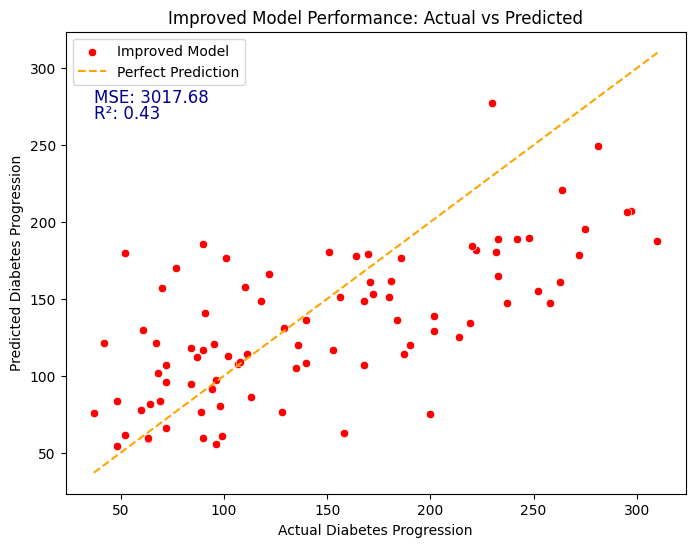

In [61]:
# Evaluate the improved model
y_pred_improved = model_improved.predict(X_test)
y_pred_improved = np.ravel(y_pred_improved)  # Flatten the prediction to 1D

# Ensure y_test is a 1D array (if it's a pandas Series)
y_test = np.array(y_test).flatten()

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)


print(f"Improved Model Mean Squared Error: {mse_improved}")
print(f"Improved Model R² Score: {r2_improved}")

# Creating a scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_improved, color='red', label="Improved Model")

# Adding a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Prediction')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Improved Model Performance: Actual vs Predicted')

# Displaying the metrics on the plot
plt.text(min(y_test), max(y_pred_improved), f'MSE: {mse_improved:.2f}', fontsize=12, color='darkblue')
plt.text(min(y_test), max(y_pred_improved)-10, f'R²: {r2_improved:.2f}', fontsize=12, color='darkblue')

plt.legend()
plt.show()

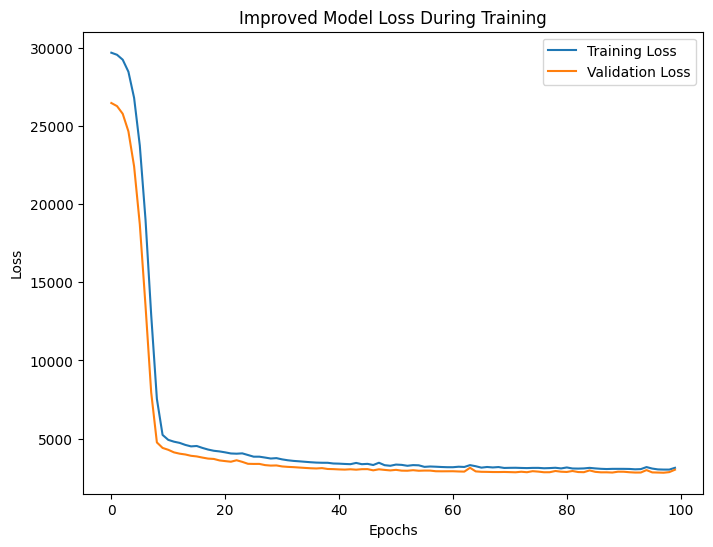

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Improved Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [63]:
model_improved.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,333 (138.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,556 (92.02 KB)

_________________
# Performance Comparison Between Base and Improved Models
_________

 ### 1. Base Model Performance :

* Mean Squared Error (MSE): 3181.57

* Mean Absolute Error (MAE): 47.06

* R² Score: 0.3995

* Loss (MSE from model.evaluate): 3181.57

### 2. Improved Model Performance :

* Mean Squared Error (MSE): 3017.68

* Mean Absolute Error (MAE): 43.51

* R² Score: 0.4304

* Loss (MSE from model.evaluate): 3017.68

___  _______

# Observations:
________

* Improved Model MSE: The improved model’s MSE (3017.68) is lower than the base model’s MSE (3181.57), suggesting that the improvements have led to a better fit and fewer prediction errors.

* Improved Model MAE: The improved model’s MAE (43.51) is also lower than the base model’s MAE (47.06), indicating the improved model makes predictions with less average error.

* Improved Model R² Score: The R² score of the improved model (0.4304) is higher than the base model (0.3995), suggesting that the improved model explains more variance in the target variable.

__________
# Conclusion:

+ The improved model still performs better than the base model, with a lower MSE, MAE, and a higher R² score. The slight changes in performance metrics might suggest that further tuning or architectural changes could help enhance the model even more.
 ___________